In [1]:
import math

import numpy as np
import keras.applications.mobilenet_v2 as k_mobilenet_v2
import keras.preprocessing.image as k_image
import keras.models as k_models
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Visualization

In [2]:
def plot_layer(name, activation, row_size=16, plot_width=16):
    
    # calculate size of plot
    size_x, size_y, channels_count = activation.shape
    col_size = math.ceil(channels_count / row_size)
    
    # create display grid
    display = np.zeros((size_y * col_size, size_x * row_size))
    
    # add channels on to display
    for c in range(channels_count):
        
        # calculate row and column
        row = c // row_size
        col = c % row_size
        
        # get channel
        channel = activation[:, :, c]
        
        # normalize to [0,1]
        channel -= np.nanmin(channel)
        channel /= np.nanmax(channel) or 1.0
        
        # add to display
        display[row*size_y:(row+1)*size_y, col*size_x:(col+1)*size_x] = channel
    
    # plot display
    plt.figure(figsize=(plot_width, plot_width/row_size*col_size))
    plt.axis('off')
    plt.imshow(display, cmap="viridis")
    plt.title(name)
    plt.show()
    

def visualize_activations(model, x, select_layers=False, **kwargs):
    
    # default select layers to all (except first one)
    if select_layers is False:
        select_layers = range(1, len(model.layers))
        
    # get layers
    outputs = [model.layers[i].output for i in select_layers]
    names = [model.layers[i].name for i in select_layers]
    
    # create model for calculating activations
    activation_model = k_models.Model(inputs=model.input, outputs=outputs)
    
    # calculate activations
    activations = activation_model.predict(x)
    
    # plot each layer
    for name, activation in zip(names, activations):
        plot_layer(name, activation[0], **kwargs)

## Example network

In [3]:
model = k_mobilenet_v2.MobileNetV2(weights='imagenet', include_top=True)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
image_path = 'images/nosacz.jpg'

# open, parse and preprocess image
image = k_image.load_img(image_path, target_size=(224, 224))
x = k_image.img_to_array(image)
x = np.expand_dims(x, axis=0)
x = k_mobilenet_v2.preprocess_input(x)

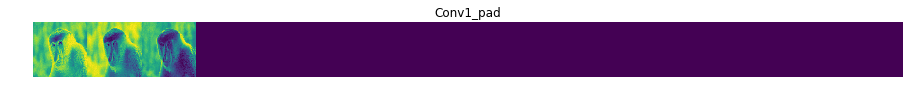

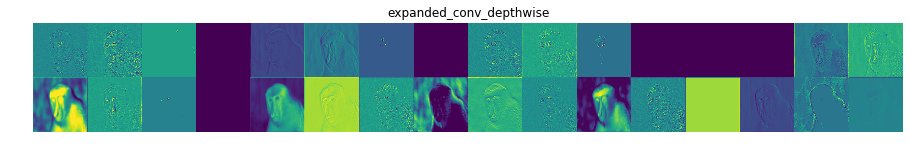

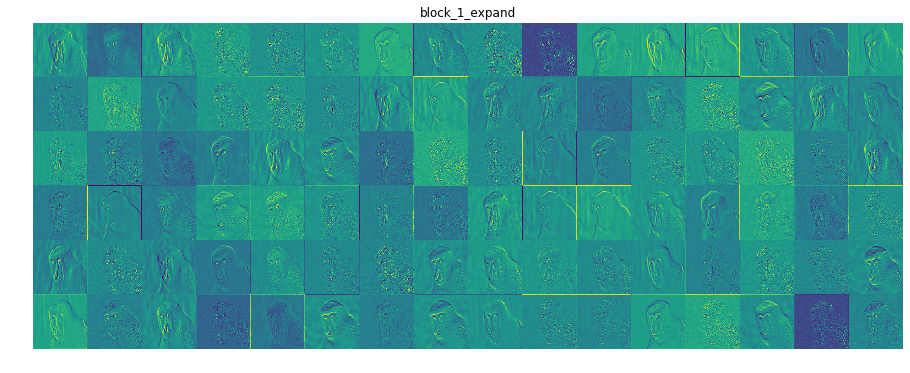

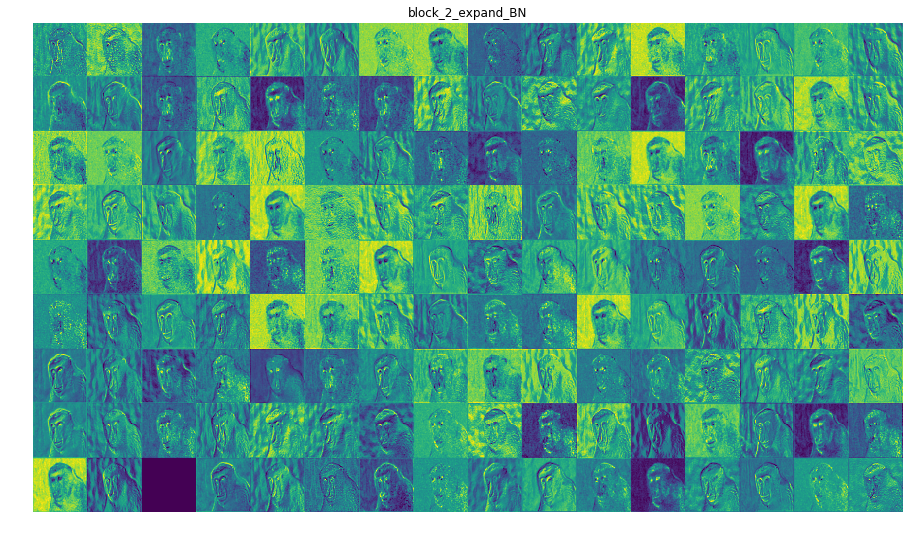

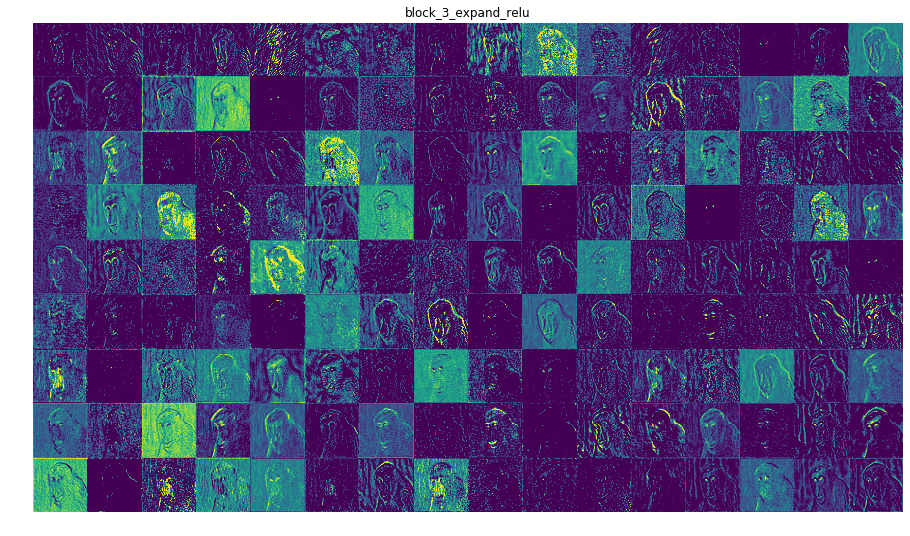

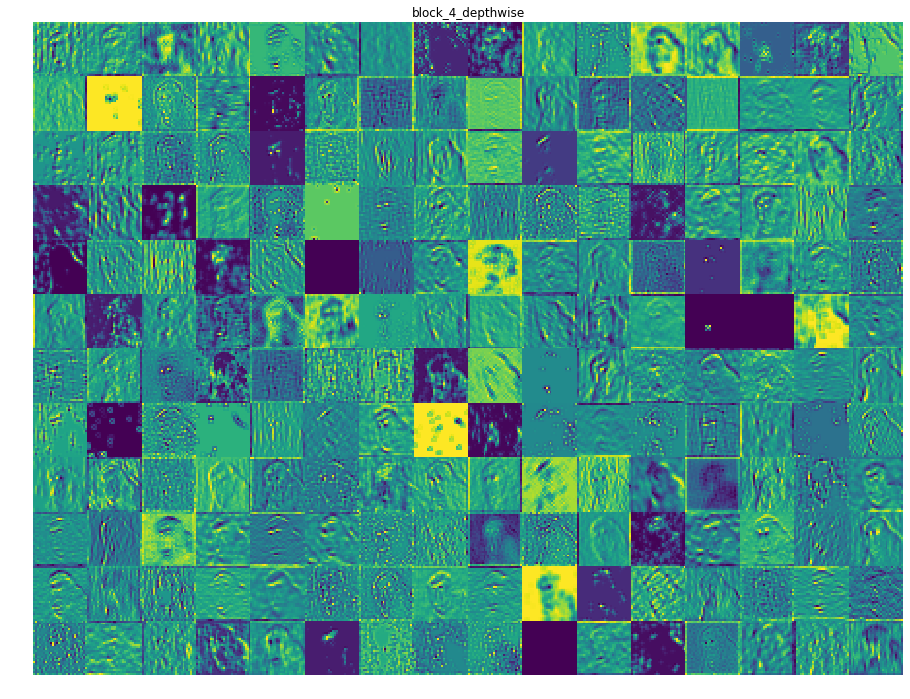

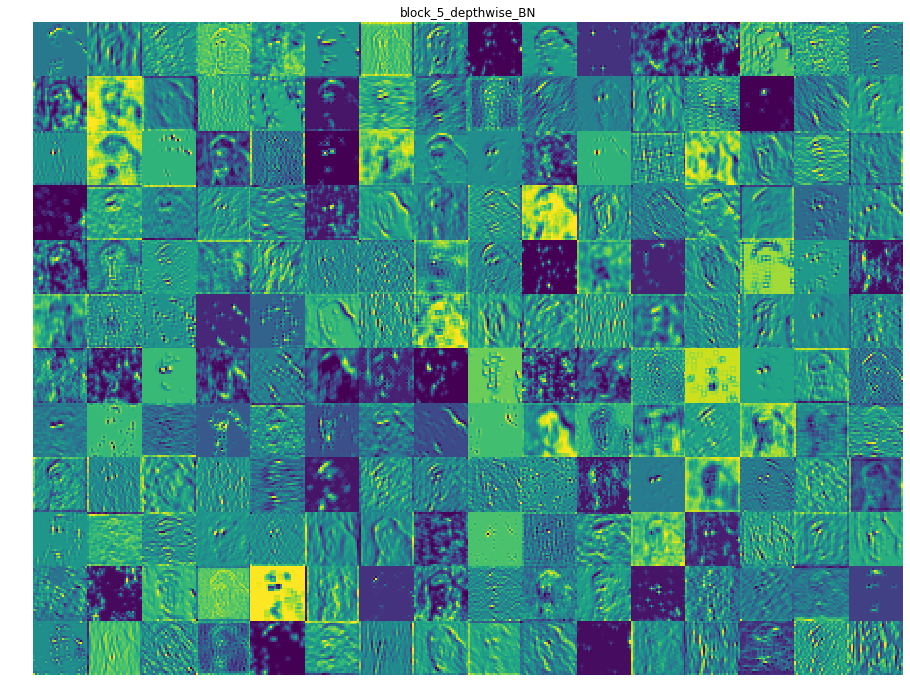

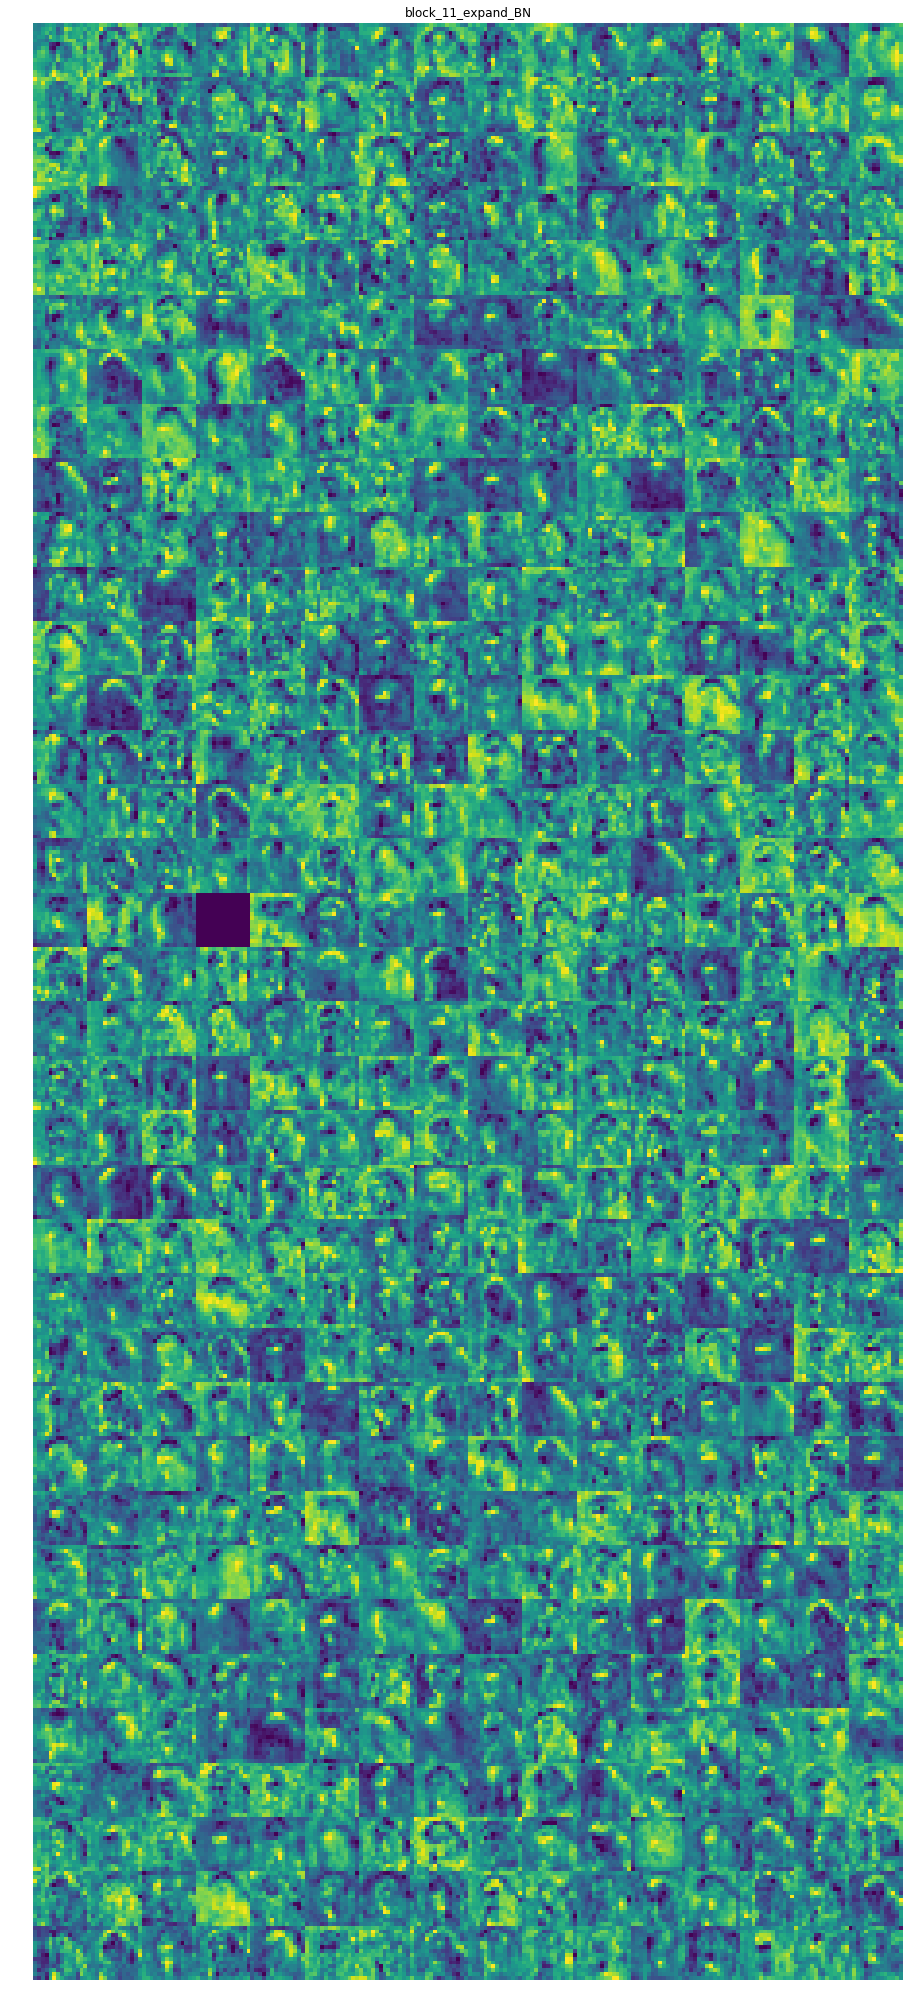

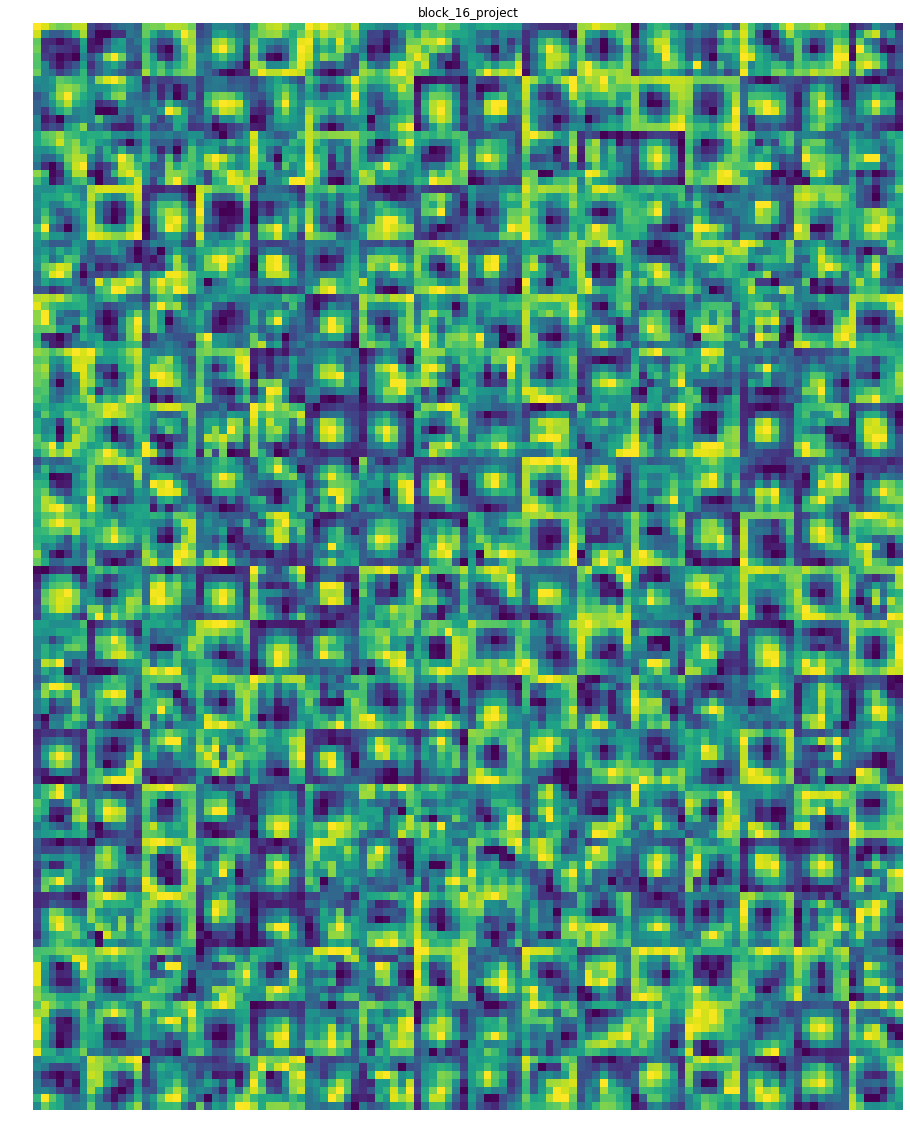

In [5]:
visualize_activations(model, x, select_layers=[1,5,10,20,30,40,50,100,150])